# Анализ функций нескольких переменных

[К оглавлению примеров](_contents.ipynb)

In [1]:
# Начальная настройка рабочей среды. Запустите эту ячейку перед началом работы!

# Загрузка пакетов
import numpy as np # Работа с массивами
import matplotlib.pyplot as plt # Графики
from mpl_toolkits.mplot3d import axes3d #3d-графики
# Выбор варианта отображения графиков:
# графики будут встраиваться в блокнот:
%matplotlib inline
# графики в отдельном окне:
# %matplotlib
# графики в блокноте, с возможностью масштабирования:
# %matplotlib nbagg

# Более крупный шрифт для графиков по умолчанию
from matplotlib import rcParams
rcParams.update({'font.size': 18})

import scipy.optimize as so # Пакет с методами оптимизации

import sympy as sp # Пакет символьной математики
sp.init_printing() # Включить отображение выражений sympy в виде математических формул

# Обход проблемы с отображением матриц - определяем функцию для их печати
from IPython.display import  Math
def printMatrix(m):
    """
    Функция для вывода в блокнот матриц SymPy.
    Использование: printMatrix(Матрица)
    """
    return Math(sp.latex(m))

In [2]:
# Функция для рисования поверхности
def plotSurface(f, xlim=(-10, 10), ylim=(-10, 10), steps=51, levels=10,
                 aspect='equal', size=(10, 10)):
    """
    Вывод графика поверхности функции двух переменных
    
    Аргументы:
    f - функция двух переменных
    xlim, ylim - диапазоны изменения переменных x и y
    steps - число шагов
    levels - количество уровней или набор уровней для построения изолиний
    aspect - соотношение масштабов по осям x и y
    size - размер рисунка
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Координаты узлов сетки для рисования графика
    xx = np.linspace(*xlim, num=steps)
    yy = np.linspace(*ylim, num=steps)        
    XX, YY = np.meshgrid(xx, yy)
    Z = f(XX, YY)    
    
    
    # Рисование поверхности
    ax.plot_surface(XX, YY, Z, rstride=8, cstride=8, alpha=0.3)
    cset = ax.contourf(XX, YY, Z, zdir='z', offset=-np.abs(Z.min()), cmap=plt.cm.viridis)

    ax.set_xlabel('X')
    #ax.set_xlim(*xlim)
    ax.set_ylabel('Y')
    #ax.set_ylim(*ylim)
    ax.set_zlabel('Z')
    #ax.set_zlim(-100, 100)

In [3]:
# Функция для рисования контурного графика
def plotContours(f, xlim=(-10, 10), ylim=(-10, 10), steps=51, levels=10,
                 aspect='equal', size=(10, 10), clim=(None, None)):
    """
    Вывод контурного графика функции двух переменных
    
    Аргументы:
    f - функция двух переменных
    xlim, ylim - диапазоны изменения переменных x и y
    steps - число шагов
    levels - количество уровней или набор уровней для построения изолиний
    aspect - соотношение масштабов по осям x и y
    size - размер рисунка
    clim - пределы для цветовой шкалы
    """
    
    # Координаты узлов сетки для рисования графика
    xx = np.linspace(*xlim, num=steps)
    yy = np.linspace(*ylim, num=steps)        
    XX, YY = np.meshgrid(xx, yy)
    Z = f(XX, YY)
    
    # Рисование контуров    
    csf = plt.contourf(XX, YY, Z, levels, cmap=plt.cm.viridis)
    plt.clim(*clim)
    plt.colorbar(csf, fraction=0.046, pad=0.04) # Подогнать размер цветовой шкалы под размер графика
    
    cs = plt.contour(XX, YY, Z, levels, colors='k')
    
    # Соотношение масштабоб по осям
    ax = plt.gca()
    ax.set_aspect('equal')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Размер рисунка
    fig = plt.gcf()
    fig.set_size_inches(size)    
        

In [4]:
# Функция для добавления поля градиентов на контурный график
def addGradients(grad_f, xlim=None, ylim=None, steps=21):
    """
    Вывод векторного поля для градиента функции двух переменных
    
    Аргументы:
    grad_f - функция, возвращающая компоненты градиента
    xlim, ylim - диапазоны изменения переменных x и y
    steps - число шагов
    """
    
    ax = plt.gca()
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    xx = np.linspace(*xlim, num=steps)
    yy = np.linspace(*ylim, num=steps)
    
    XX, YY = np.meshgrid(xx, yy)    
    U, V = grad_f(XX, YY)
    
    plt.quiver(XX,YY,U,V)
    
        

In [5]:
# Функция для добавления на контурный график градиента (и антиградиента) в заданной точке
def addGradient(x, y, grad_f, color='red', antigrad=False, antiColor='lightSkyBlue'):
    """
    Вывод градиента функции двух переменных в указанных точках
    
    Аргументы:
    x, y - координаты точки (или векторы с координатами точек)
    grad_f - функция, возвращающая компоненты градиента
    color - цвет для точки и градиента
    antigrad - рисовать антиградиент
    antiColor - цвет для антиградиента
    """

    plt.plot(x, y, marker='o', markersize=8, mfc=color, mec=None, linestyle='none')  
    U, V = grad_f(x, y)    
    plt.quiver(x,y,U,V, color=color)
    if antigrad:
        plt.quiver(x,y,-U,-V, color=antiColor)
    
    

In [6]:
# Функция для добавления на контурный график точки
def addPoint(x, y, color='lightskyblue'):
    """
    Вывод градиента функции двух переменных в указанных точках
    
    Аргументы:
    x, y - координаты точки (или векторы с координатами точек)
    color - цвет для точки
    """

    plt.plot(x, y, marker='o', markersize=10, mfc=color, mec=None, linestyle='none')  

## Параболическая функция с минимумом

Функция: $f(x, y) = x^2 + y^2 $

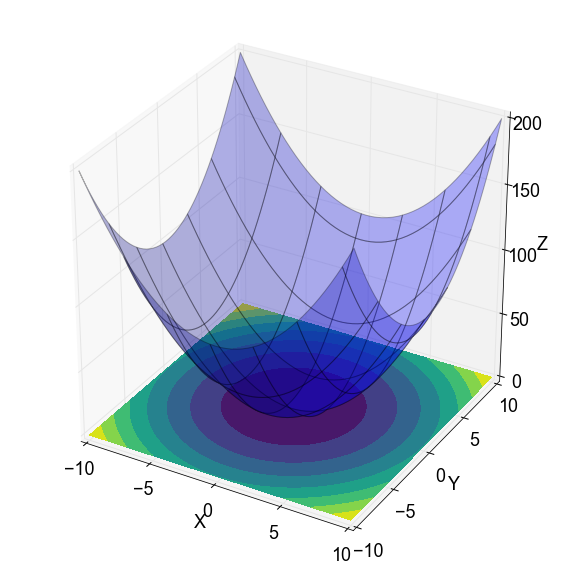

In [7]:
f = lambda x, y: x**2 + y**2
plotSurface(f)
plt.gcf().set_size_inches(10, 10)
#plt.savefig('parab2_surface.png', dpi=150)

Частные производные:

$$\frac{\partial f(x,y)}{\partial x} = 2x $$
$$\frac{\partial f(x,y)}{\partial y} = 2y $$

Градиент:

$$\nabla f(x,y) = 
\left[
\begin{array}[c]\\
        2 x \\
        2 y \\
\end{array}
\right]
$$

In [8]:
grad_f = lambda x, y: np.array([2*x, 2*y])

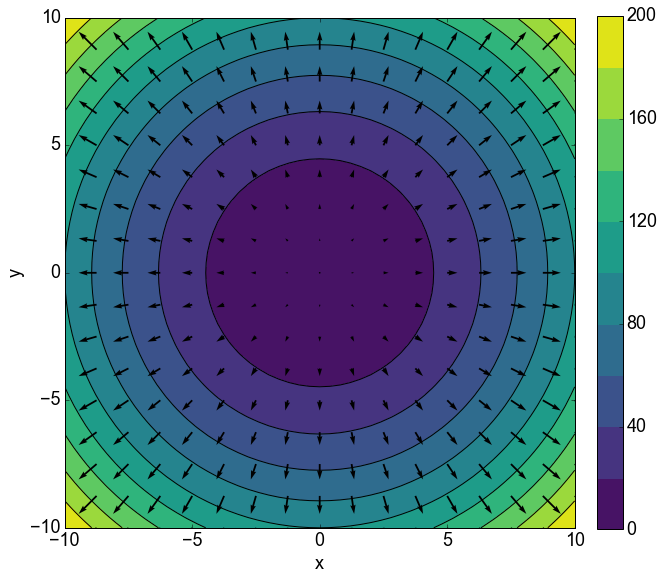

In [9]:
plotContours(f)
addGradients(grad_f, steps=17)
#plt.savefig('parab2_gradients.png', dpi=150)

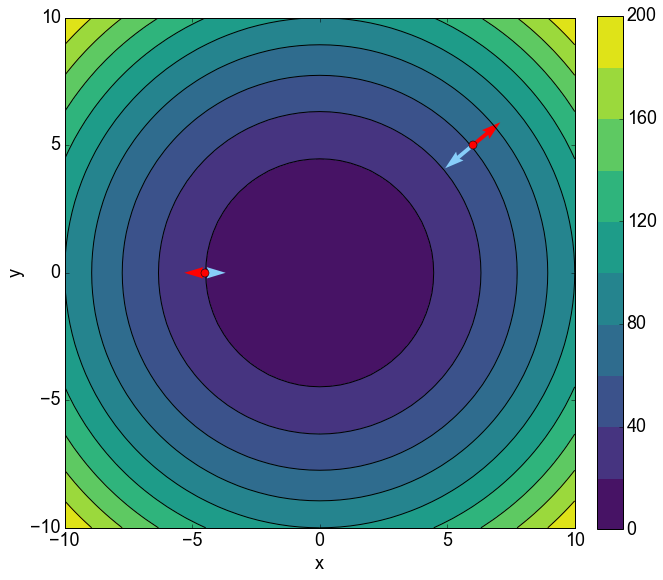

In [10]:
plotContours(f)
addGradient(np.array((6, -4.5)), np.array((5, 0)), grad_f, antigrad=True)

In [11]:
# Символьное вычисление градиента
x, y = sp.symbols('x, y')
fs = x**2 + y**2
J_f = sp.Matrix([fs]).jacobian([x, y]).T

printMatrix(J_f)

<IPython.core.display.Math object>

In [12]:
# Стационарная точка:
root = sp.solve(J_f, [x, y])
root

In [13]:
# Матрица Гессе:
H_f = sp.hessian(fs, [x, y])
printMatrix(H_f)

<IPython.core.display.Math object>

In [14]:
# Первый определитель Сильвестра:
H_f[0, 0]

In [15]:
# Второй определитель Сильвестра:
H_f.det()

Гессиан положительно определен, в стационарной точке - минимум

In [16]:
# Собственные значения:
H_f.eigenvals()

У матрицы два положительных собственных значения (2 и 2), значит, она положительно определенная. 

In [17]:
# Преобразование выражения для градиента в вычисляемую функцию

# Должен возвращаться массив, а не матрица, иначе не работает функция для рисования градиентов
mat2array = [{'ImmutableMatrix': np.array}, 'numpy']
grad_fs = sp.lambdify([x, y], J_f, modules=mat2array)

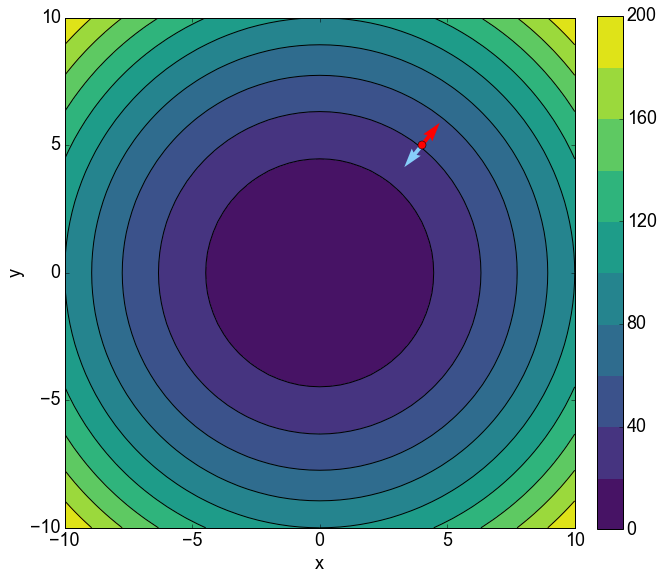

In [18]:
# Получив функцию для вычисления градиента, можем ее нарисовать:
plotContours(f)
addGradient(4, 5, grad_fs, antigrad=True)

## Параболическая функция с максимумом

Функция: $g(x, y) = 200 - x^2 - y^2 $
Частные производные:

$$\frac{\partial g(x,y)}{\partial x} = -2x $$
$$\frac{\partial g(x,y)}{\partial y} = -2y $$

Градиент:

$$\nabla g(x,y) = 
\left[
\begin{array}\\
        -2 x \\
        -2 y \\
\end{array}
\right]
$$

In [19]:
g = lambda x, y : 200 - x**2 - y**2
grad_g = lambda x, y: -grad_f(x, y)

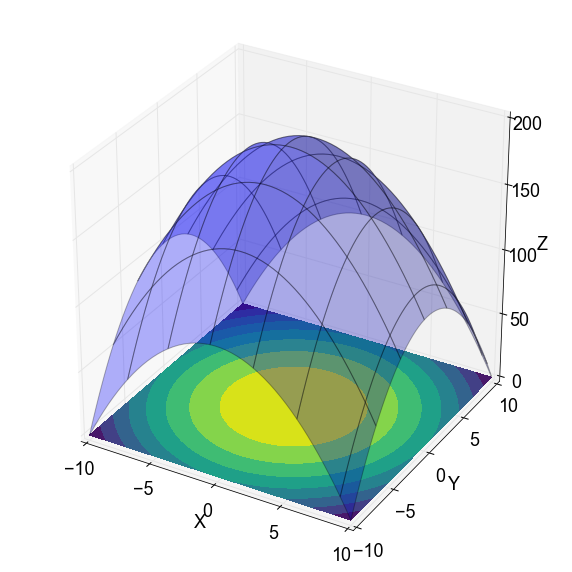

In [20]:
plotSurface(g)
plt.gcf().set_size_inches(10, 10)
#plt.savefig('parab_surface.png', dpi=150)

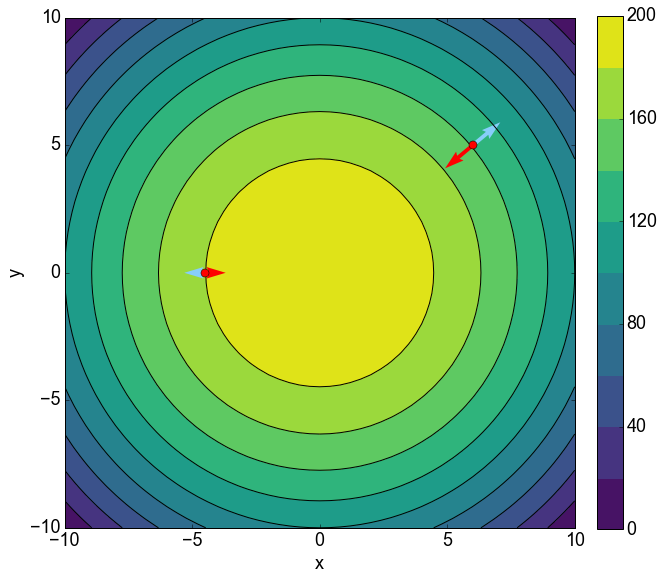

In [21]:
plotContours(g)
addGradient(np.array((6, -4.5)), np.array((5, 0)), grad_g, antigrad=True)
#plt.savefig('parab_antigrad.png', dpi=150)

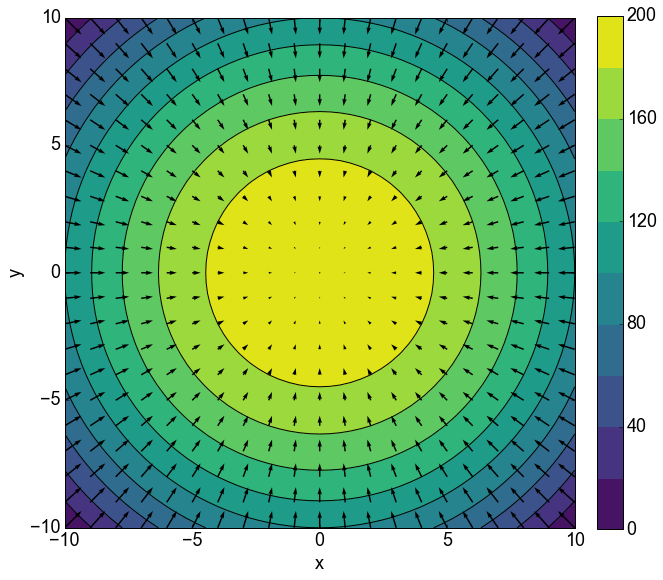

In [22]:
plotContours(g)
addGradients(grad_g)
#plt.savefig('parab_gradients.png',dpi=150)

In [23]:
# Символьное вычисление градиента
gs = 200 - x**2 - y**2
J_g = sp.Matrix([gs]).jacobian([x, y]).T
printMatrix(J_g)

<IPython.core.display.Math object>

In [24]:
# Стационарная точка:
root_g = sp.solve(J_g, [x, y])
root_g

In [25]:
# Матрица Гессе:
H_g = sp.hessian(gs, [x, y])
printMatrix(H_g)

<IPython.core.display.Math object>

In [26]:
# Первый определитель Сильвестра:
H_g[0, 0]

In [27]:
# Второй определитель Сильвестра:
H_g.det()

Гессиан отрицательно опеределен, стационарная точка - максимум

In [28]:
# Собственные значения:
H_g.eigenvals()

У матрицы два отрицательных собственных значения (-2 и -2), значит, она отрицательно определенная. 

## Функция с седловой точкой

Функция: $p(x, y) = x^2 - y^2 $
Частные производные:

$$\frac{\partial p(x,y)}{\partial x} = 2x $$
$$\frac{\partial p(x,y)}{\partial y} = -2y $$

Градиент:

$$\nabla p(x,y) = 
\left[
\begin{array}\\
        2 x \\
        -2 y \\
\end{array}
\right]
$$

In [29]:
p = lambda x, y : x**2 - y**2
grad_p = lambda x, y: np.array([2*x, -2*y])

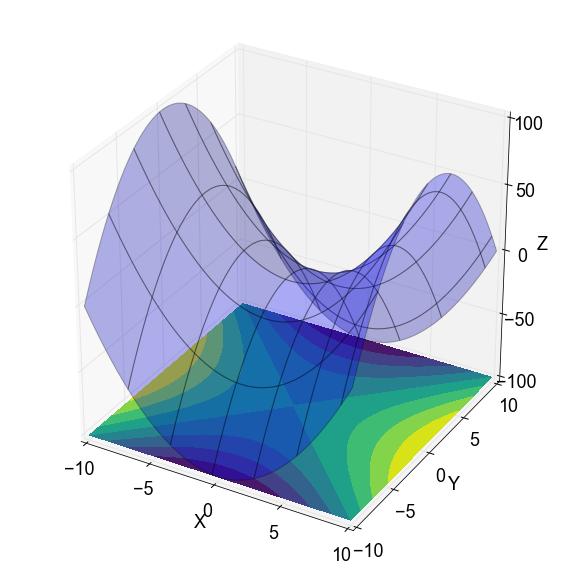

In [30]:
plotSurface(p)
plt.gcf().set_size_inches(10, 10)
#plt.savefig('gipar_surface.png', dpi=150)

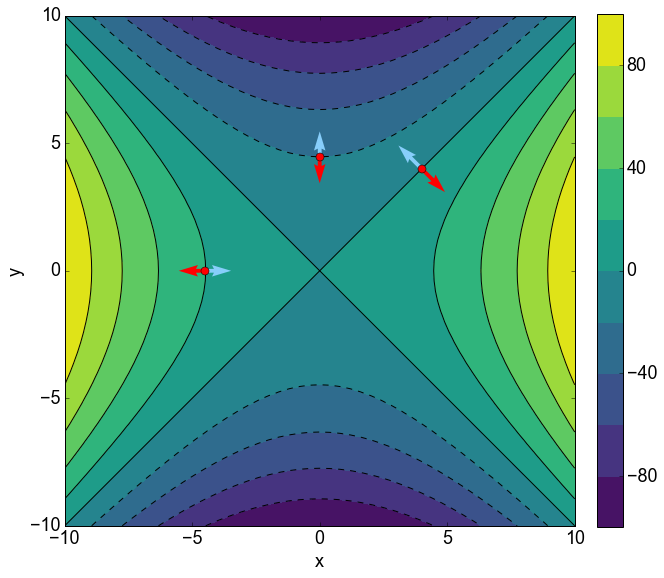

In [31]:
plotContours(p)

addGradient(np.array((4, 0, -4.5)), np.array((4, 4.45, 0)), grad_p, antigrad=True)
#addGradient(0, 4.45, grad_h, antigrad=True)
#addGradient(-4.5, 0, grad_h, antigrad=True)

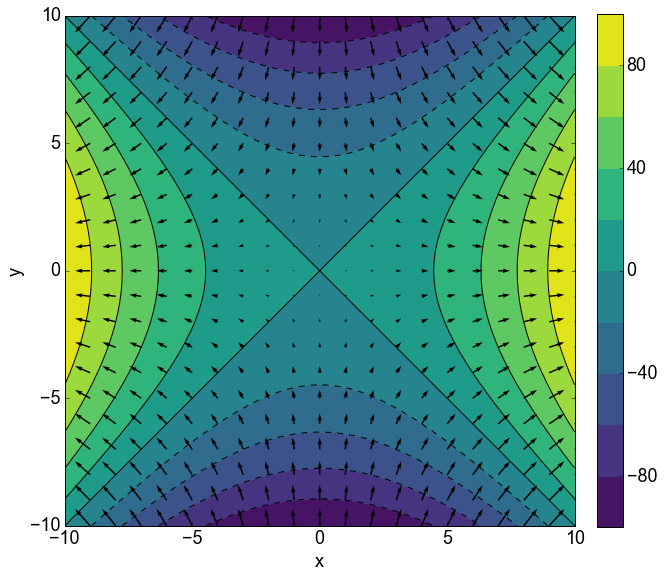

In [32]:
plotContours(p)
addGradients(grad_p)
#plt.savefig('gipar_gradients.png',dpi=150)

In [33]:
# Символьное вычисление градиента
ps = x**2 - y**2
J_p = sp.Matrix([ps]).jacobian([x, y]).T
printMatrix(J_p)

<IPython.core.display.Math object>

In [34]:
# Стационарная точка:
root_p = sp.solve(J_p, [x, y])
root_p

In [35]:
# Матрица Гессе:
H_p = sp.hessian(ps, [x, y])
printMatrix(H_p)

<IPython.core.display.Math object>

In [36]:
# Первый определитель Сильвестра:
H_f[0, 0]

In [37]:
# Второй определитель Сильвестра:
H_p.det()

Чередование знаков не соответствует условию отрицательной определенности, - значит, экстремума в стационарной точке нет

In [38]:
# Собственные значения:
H_p.eigenvals()

У матрицы два собственных значения разных знаков (-2 и 2), значит, она неопределенная. 

## Овражная функция

Функция: $k(x, y) = x^2 + 2 y^2 + x y$
Частные производные:

$$\frac{\partial f(x,y)}{\partial x} = 2x + y $$
$$\frac{\partial f(x,y)}{\partial y} = x + 4y $$

Градиент:

$$\nabla f(x,y) = 
\left[
\begin{array}\\
        2 x + y \\
        x + 4y \\
\end{array}
\right]
$$

In [39]:
k = lambda x, y: x**2 + 2 * y**2 + x * y

In [40]:
ks = x**2 + 2 * y**2 + x * y
J_k = sp.Matrix([ks]).jacobian([x, y]).T
grad_ks= sp.lambdify([x, y], J_k, modules=mat2array)
printMatrix(J_k)

<IPython.core.display.Math object>

In [41]:
grad_k = lambda x, y: np.array([2 * x + y, x + 4 * y])

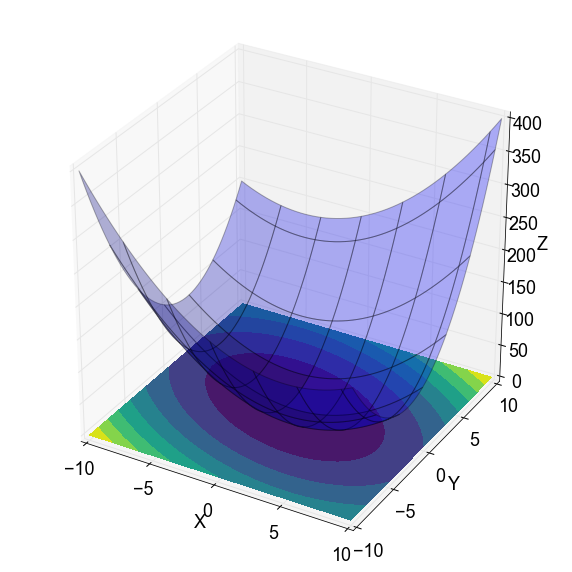

In [42]:
plotSurface(k)
plt.gcf().set_size_inches(10, 10)
#plt.savefig('interact_surface.png',dpi=150)

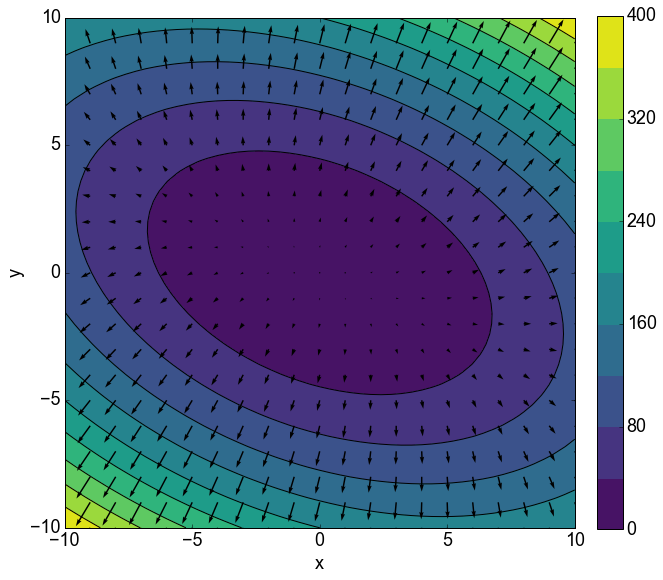

In [43]:
plotContours(k)
addGradients(grad_k)
#plt.savefig('interact_gradients.png',dpi=150)

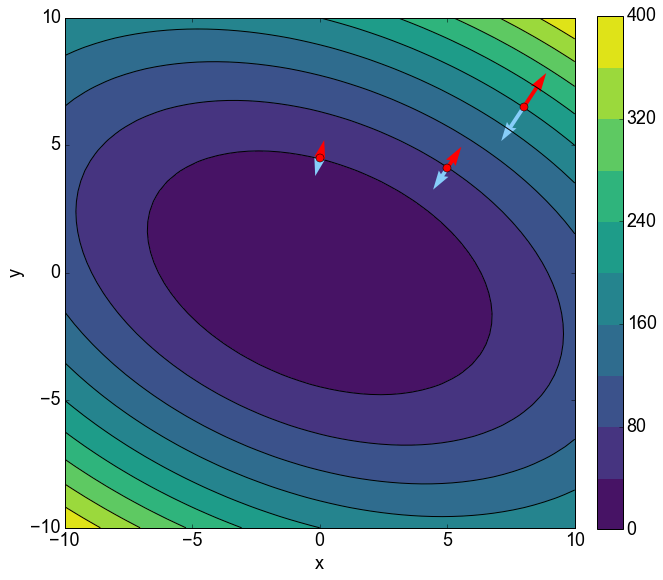

In [44]:
plotContours(k)
addGradient(np.array((0, 5, 8)), np.array((4.5, 4.1, 6.5)), grad_ks, antigrad=True)
#plt.savefig('interact_antigrad.png',dpi=150)

In [45]:
# Символьное вычисление градиента (уже сделано выше)
J_k
printMatrix(J_k)

<IPython.core.display.Math object>

In [46]:
# Стационарная точка:
root_k = sp.solve(J_k, [x, y])
root_k

In [47]:
# Матрица Гессе:
H_k = sp.hessian(ks, [x, y])
printMatrix(H_k)

<IPython.core.display.Math object>

In [48]:
# Первый определитель Сильвестра:
H_k[0, 0]

In [49]:
# Второй определитель Сильвестра:
H_k.det()

Гессиан положительно определен, в стационарной точке - минимум

In [50]:
# Собственные значения:
H_k.eigenvals()

In [51]:
# Преобразовать в действительное число
for v in H_k.eigenvals():
    print(v.evalf())
    

4.41421356237309
1.58578643762690


Оба собственных значения положительны. Матрица - положительно определенная, найден минимум.

## Многоэкстремальная функция

In [52]:
m = lambda x, y : np.sin(x) + np.sin(y) - np.sin(x * y)

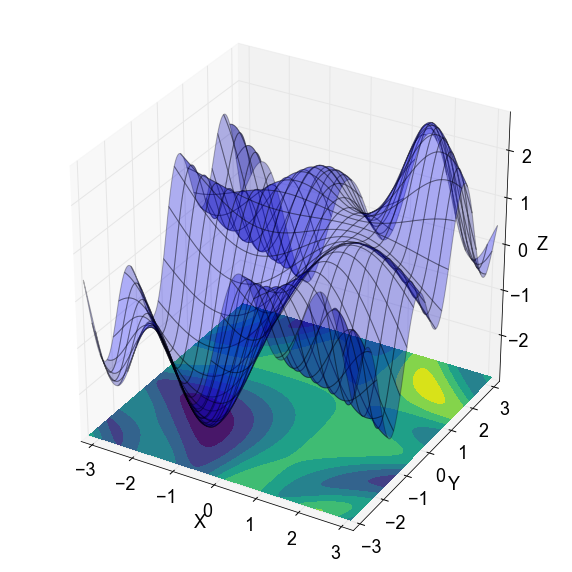

In [53]:
plotSurface(m, xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), steps=200)
plt.gcf().set_size_inches(10, 10)

In [54]:
ms = sp.sin(x) + sp.sin(y) - sp.sin(x * y)
J_m = sp.Matrix([ms]).jacobian([x, y]).T
printMatrix(J_m)

<IPython.core.display.Math object>

In [55]:
H_m = sp.hessian(ms, [x, y])
printMatrix(H_m)

<IPython.core.display.Math object>

In [56]:
grad_m = lambda x, y : np.array([-y *np.cos(x*y) + np.cos(x), -x * np.cos(x*y) + np.cos(y)])

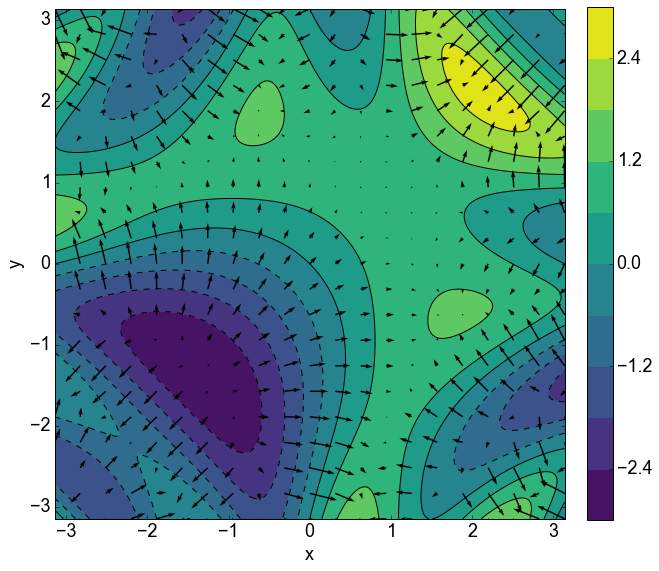

In [57]:
plotContours(m, xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), steps=200)
addGradients(grad_m)

Найти аналитически стационарные точки функции в Sympy не удалось, однако можно найти их координаты численно, используя функции пакета scipy.optimize

In [58]:
# Начально приближение для стационарной точки 1:
X_1 = np.array([-1, -1])

# Функция-обертка, необходимая для того, чтобы вычислить градиент для векторного аргумента:
grad_m_X = lambda X: grad_m(X[0], X[1])

res_1 = so.root(grad_m_X, X_1)
X_1 = res_1.x

# Координаты стационарной точки 1
X_1 

array([-1.32496152, -1.32496152])

In [59]:
# Начально приближение для стационарной точки 2:
X_2 = np.array([2, 2])

res_2 = so.root(grad_m_X, X_2)
X_2 = res_2.x

# Координаты стационарной точки 1
X_2

array([ 2.11320123,  2.11320123])

In [60]:
# Матрица Гессе в точке X_1
H_X_1 = H_m.subs(dict(x=X_1[0], y=X_1[1]))
printMatrix(H_X_1)

<IPython.core.display.Math object>

In [61]:
# Первый определитель Сильвестра:
H_X_1[0, 0]

In [62]:
# Второй определитель Сильвестра:
H_X_1.det()

Матрица положительно определенная. В точке $X_1$ - минимум.

In [63]:
# Матрица Гессе в точке X_2
H_X_2 = H_m.subs(dict(x=X_2[0], y=X_2[1]))
printMatrix(H_X_2)

<IPython.core.display.Math object>

In [64]:
# Первый определитель Сильвестра:
H_X_2[0, 0]

In [65]:
# Второй определитель Сильвестра:
H_X_2.det()

Гессиан отрицательно опеределен, стационарная точка $X_2$ - максимум

In [66]:
# Собственные значения матрицы Гессе в двух точках:

print(H_X_1.eigenvals()) # Минимум
print(H_X_2.eigenvals()) # Максимум

{18419692754391/4000000000000: 1, 78625661807911/100000000000000: 1}
{-3439819930843/3125000000000: 1, -463643921142811/50000000000000: 1}


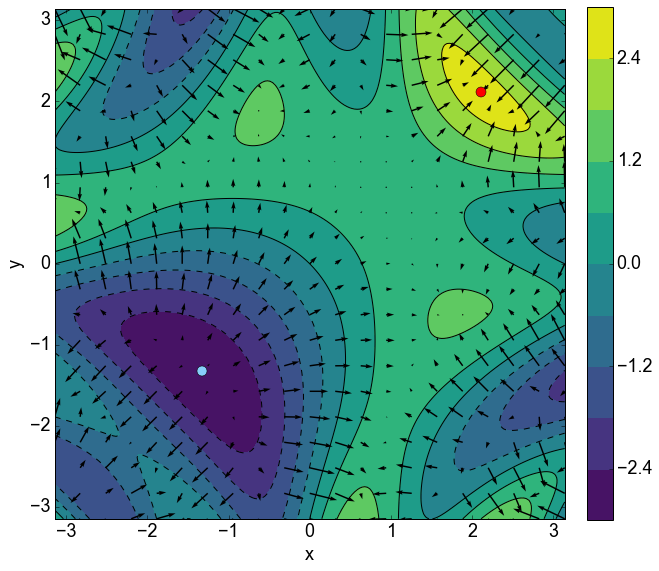

In [67]:
plotContours(m, xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi), steps=200)
addGradients(grad_m)
addPoint(X_1[0], X_1[1])
addPoint(X_2[0], X_2[1], color='red')

## Тестовая функция Розенброка

Функция Розенброка: $r(x, y) = 100(y - x^2)^2 + (1-x)^2 $

In [68]:
r = lambda x, y: 100 * (y - x**2)**2 + (1 - x)**2
rs = 100 * (y - x**2)**2 + (1 - x)**2
J_r = sp.Matrix([rs]).jacobian([x, y]).T
grad_rs = sp.lambdify((x, y), J_r, modules=mat2array)
printMatrix(J_r)

<IPython.core.display.Math object>

In [69]:
H_r = sp.hessian(rs, [x, y])
printMatrix(H_r)

<IPython.core.display.Math object>

In [70]:
sp.solve(J_r, [x, y])

In [71]:
H_min=H_r.subs(dict(x=1, y=1))
printMatrix(H_min)

<IPython.core.display.Math object>

In [72]:
for f in (H_min.eigenvals()):
    print(f.evalf(4))
    

0.3994
1002.


In [73]:
H_min.det()

Матрица Гессе положительно определенная, в стационарной точке - минимум

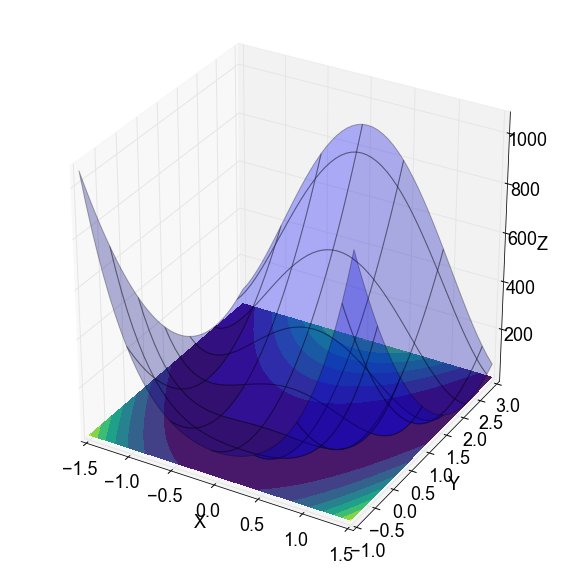

In [74]:
plotSurface(r, xlim=(-1.5, 1.5), ylim=(-1.0, 3), levels=30)
plt.gcf().set_size_inches(10, 10)

# Направление обзора и расстояние до наблюдателя
#plt.gca().view_init(elev=45, azim=-120)

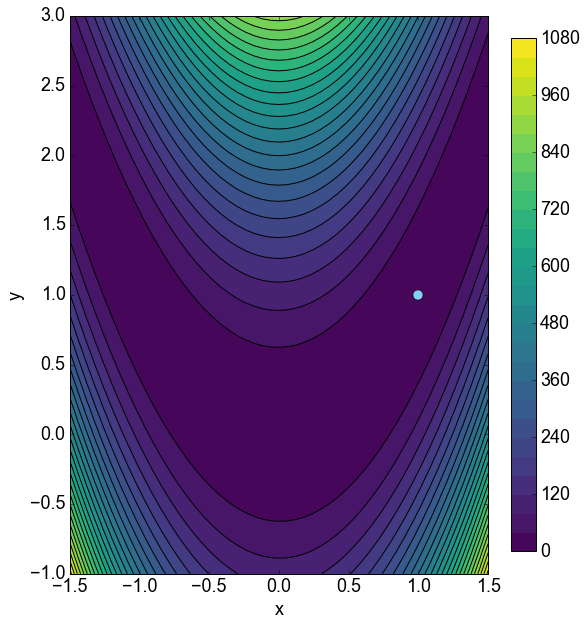

In [75]:
plotContours(r, xlim=(-1.5, 1.5), ylim=(-1.0, 3), levels=30)
addPoint(1, 1)
plt.gcf().set_size_inches(10, 10)

# Пример поиска экстремума функции двух переменных с помощью SymPy

Найти экстремумы [тестовой функции Химмельблау](https://ru.wikipedia.org/wiki/Функция_Химмельблау):

$$ h(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2 $$

Определить тип каждого экстремума

## Анализ графика функции

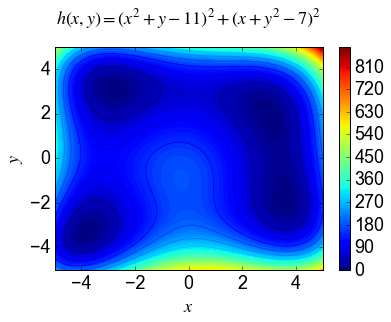

In [76]:
# Задаем функцию:
h = lambda x, y : (x**2 + y - 11)**2 + (x + y**2 -7)**2  
# Результат - функция Python h(x, y), позволяющая вычислить значение функции Химмельблау в точке (x, y)
# Эта функция необходима для рисования графиков

# Диапазон изменения x
xh = np.linspace(-5, 5, 101)
yh = xh # такой же, как и по x

# Координаты узлов сетки для построения контурного графика:
X, Y = np.meshgrid(xh, yh)

# Контурный график
plt.contourf(X,Y,h(X, Y), 100) # цветовая заливка контуров
plt.colorbar()
plt.contour(X,Y,h(X,Y), 20) # контурные линии

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title(r'$h(x, y) = (x^2+y-11)^2 + (x+y^2-7)^2 $', fontsize=18, y=1.08);

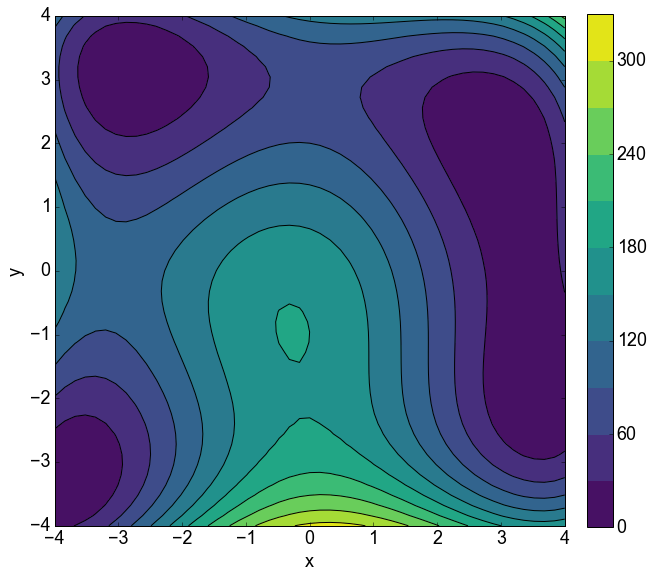

In [77]:
# Также можно воспользоваться функцией plotContours(), заданной в начале блокнота
plotContours(h, xlim=(-4, 4), ylim=(-4, 4))

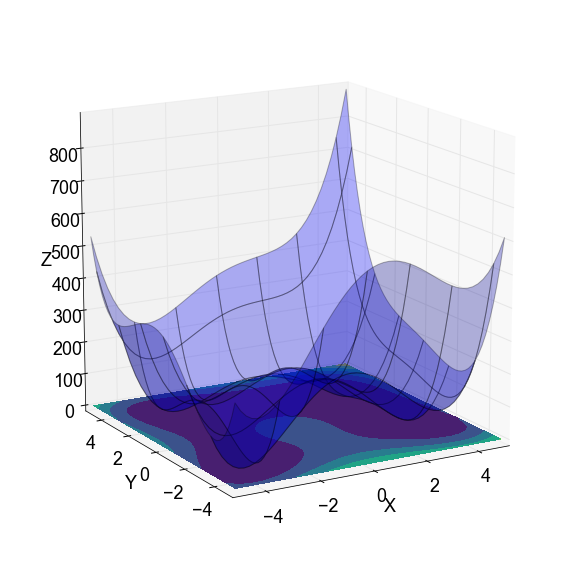

In [78]:
# График поверхности можно построить с помощью функции plotSurface, заданной в начале блокнота.
# См. также примеры здесь: http://matplotlib.org/gallery.html#mplot3d
plotSurface(h, xlim=(-5, 5), ylim=(-5, 5))
plt.gcf().set_size_inches(10, 10) # сделать график крупнее
plt.gca().view_init(elev=15, azim=-120)

## Вычисление градиента и гессиана

In [79]:
# Создаем символы для записи выражения
x, y = sp.symbols('x, y') 
# Убедитесь, что вы не заменяете никакие используемые в блокноте имена переменных!

# Задаем аналитическое выражение для функции
hs = (x**2 + y - 11)**2 + (x + y**2 -7)**2
# Результат: в переменную hs сохранено выражение для функции Химмельблау. 
# Это выражение можно преобразовывать с помощью функций пакета SymPy, но нельзя использовать 
# для вычисления численного значения функции в произвольной точке и рисования графиков matplotlib.
# Это - не функция!

# Компоненты градиента можно вычислить используя метод diff() выражения SymPy:
dh_dx = hs.diff(x)
dh_dx

In [80]:
dh_dy = hs.diff(y)

In [81]:
# Можно также упростить выражения, раскрыв скобки и приведя подобные слагаемые с помощью метода expand():
dh_dx.expand()

In [82]:
# Аналогичным образом можно вычислить вторые производные для матрицы Гессе
d2h_dxdx = hs.diff(x, 2)
d2h_dxdx.expand()

In [83]:
d2h_dxdy = hs.diff(x, y)
d2h_dxdy.expand()

In [84]:
# Однако удобнее получить сразу все компоненты этих матриц, используя специальные функции

# Для вычисления градиента можно воспользоваться методом jacobian(), который есть у матриц Sympy.
# Но надо сначала создать матрицу из выражения для функции.

J_h = sp.Matrix([hs]).jacobian([x, y])

# Упрощаем и транспонируем:
J_h = J_h.expand().T
printMatrix(J_h) #Функция задана в начале блокнота. Автопечать не работает с матрицами!

<IPython.core.display.Math object>

In [85]:
# Для вычисления гессиана есть функция hessian(). Она вычисляет матрицу Гессе для заданного выражения, 
# т.е. непосредственно для hs. Матрица здесь не нужна.
H_h = sp.hessian(hs, [x, y])
printMatrix(H_h)

<IPython.core.display.Math object>

## Поиск стационарных точек

Стационарные точки функции можно найти, решив уравнение:

$$ \nabla f(x, y) = \bar 0 $$

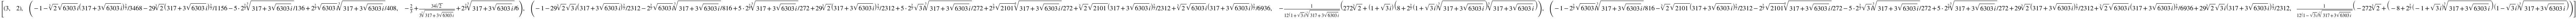

In [86]:
# Для поиска решений системы уравнений, полученной из равенства нулю всех частных производных, используем функцию sp.solve()
# Т.к. система получается в неявном виде, правую часть не нужно указывать. В этом случае она предполагается нулевой.

roots = sp.solve(J_h, [x, y])
roots

Получен список из корней системы уравнений вида: `[(x1, y1), (x2, y2), ...]`, однако, выглядят корни страшно.

Для упрощения попробуем вычислить значения корней в виде действительных или комплексных чисел, используя метод `evalf()`


In [87]:
# Корни хранятся в списке,  в виде пар (x,y) 
# поэтому необходимо вызвать этот метод в цикле у каждого элемента каждой пары:
for (X, Y) in roots: # Нельзя использовать (x, y), т.к. в этом случае портятся символы
    print([X.evalf(), X.evalf()])

[3.00000000000000, 3.00000000000000]
[-2.80511808695274 + 0.e-22*I, -2.80511808695274 + 0.e-22*I]
[3.58442834033049 - 0.e-22*I, 3.58442834033049 - 0.e-22*I]
[-3.77931025337775 + 0.e-24*I, -3.77931025337775 + 0.e-24*I]


Обратим внимание, что корни получились комплексными, однако мнимая часть очень мала. Возможно, это - следствие погрешности в расчетах. Попробуем отбросить мнимую часть, используя функцию `re()` (действительная часть числа).

In [88]:
# Действительная часть для каждого из корней:
for (X, Y) in roots:
    print([sp.re(X).evalf(), sp.re(Y).evalf()])

[3.00000000000000, 2.00000000000000]
[-2.80511808695274, 3.13131251825057]
[3.58442834033049, -1.84812652696440]
[-3.77931025337775, -3.28318599128617]


In [89]:
# Этот результат запомним в новом списке в виде словаря со значением для каждого символа:
realroots = [ { x: sp.re(X).evalf(), y: sp.re(Y).evalf()} for X, Y in roots]
realroots

Заметим также, что стационарные точки можно было найти и численно, используя функцию `root()` пакета `scipy.optimize`.

Проверим значение градиента в найденных стационарных точках:

In [90]:
printMatrix([J_h.subs(r) for r in realroots])

<IPython.core.display.Math object>

Для комплексных корней градиент немного отличается от нуля

## Вычисление гессиана в стационарных точках

Вычислим значение матрицы Гессе в точке, соответствующей каждому из корней:

In [91]:
hessians = [H_h.subs(rr) for rr in realroots]
printMatrix(hessians)

<IPython.core.display.Math object>

Вычислим определители Сильвестра для матрицы Гессе в стационарных точках:

In [92]:
[{'h1':H[0, 0], 'h2':H.det()} for H in hessians]

[{'h1': 74.0000000000000, 'h2': 2116.00000000000},
 {'h1': 64.9494998539954, 'h2': 5222.89668085140},
 {'h1': 104.785012215715, 'h2': 3024.53986529482},
 {'h1': 116.265487930289, 'h2': 9460.56345385379}]

Все матрицы Гессе положительно определенные. Значит, найденные стационарные точки - минимумы.

## Проверка результата

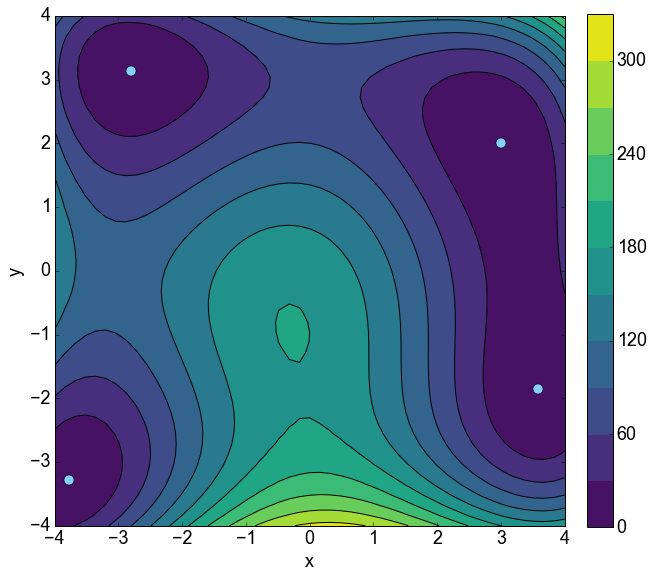

In [93]:
# Рисуем контурный график функции
plotContours(h, xlim=(-4, 4), ylim=(-4, 4))

# Добавляем стационарные точки
for rr in realroots:
    addPoint(rr[x], rr[y])

In [94]:
realroots

Удалось найти все локальные минимумы функции Химмельблау. Однако пропущен локальный максимум в точке $[-0.270845, -0.923039]$ (см. [здесь](https://ru.wikipedia.org/wiki/Функция_Химмельблау))

Координаты точки максимума можно найти численно, с помощью функции `root()` пакета scipy.optimize

In [95]:
# Градиент в заданной точке:
printMatrix(J_h)

<IPython.core.display.Math object>

In [96]:
# Функция для вычисления градиента с векторным аргументом: 
# x = X[0], y=X[1]
grad_h_X = lambda X: np.array([
        4*X[0]**3 + 4 * X[0] * X[1] - 42 * X[0] + 2 * X[1]**2 - 14,
        2 * X[0]**2 + 4 * X[0] * X[1] + 4 * X[1]**3 - 26 * X[1] - 22])

# Начальное приближение:
X_max = np.array([0, 0])

# Уточненное значение - из равенства нулю частных производных:
X_max = so.root(grad_h_X, X_max).x
X_max

array([-0.27084459, -0.92303856])

Проверим значения градиента и гессиана в точке максимума:

In [97]:
printMatrix(J_h.subs({x:X_max[0], y:X_max[1]}))

<IPython.core.display.Math object>

In [98]:
H_hmax = H_h.subs({x:X_max[0], y:X_max[1]})
printMatrix(H_hmax)

<IPython.core.display.Math object>

Определители Сильвестра:

In [99]:
H_hmax[0, 0]

In [100]:
H_hmax.det()

Матрица Гессе отрицательно определенная - значит, в стационарной точке - максимум

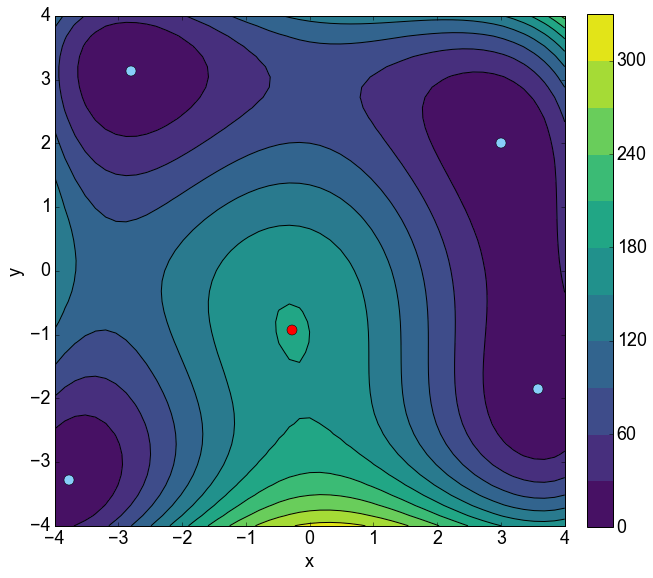

In [101]:
# Рисуем контурный график функции
plotContours(h, xlim=(-4, 4), ylim=(-4, 4))

# Добавляем стационарные точки
for rr in realroots:
    addPoint(rr[x], rr[y])
    
addPoint(X_max[0], X_max[1], color='red')